## ***⚡CAPSTONE PROJECT ON airbnb BOOKING ANALYSIS⚡***
---
---
(SHRUTI DESAI)

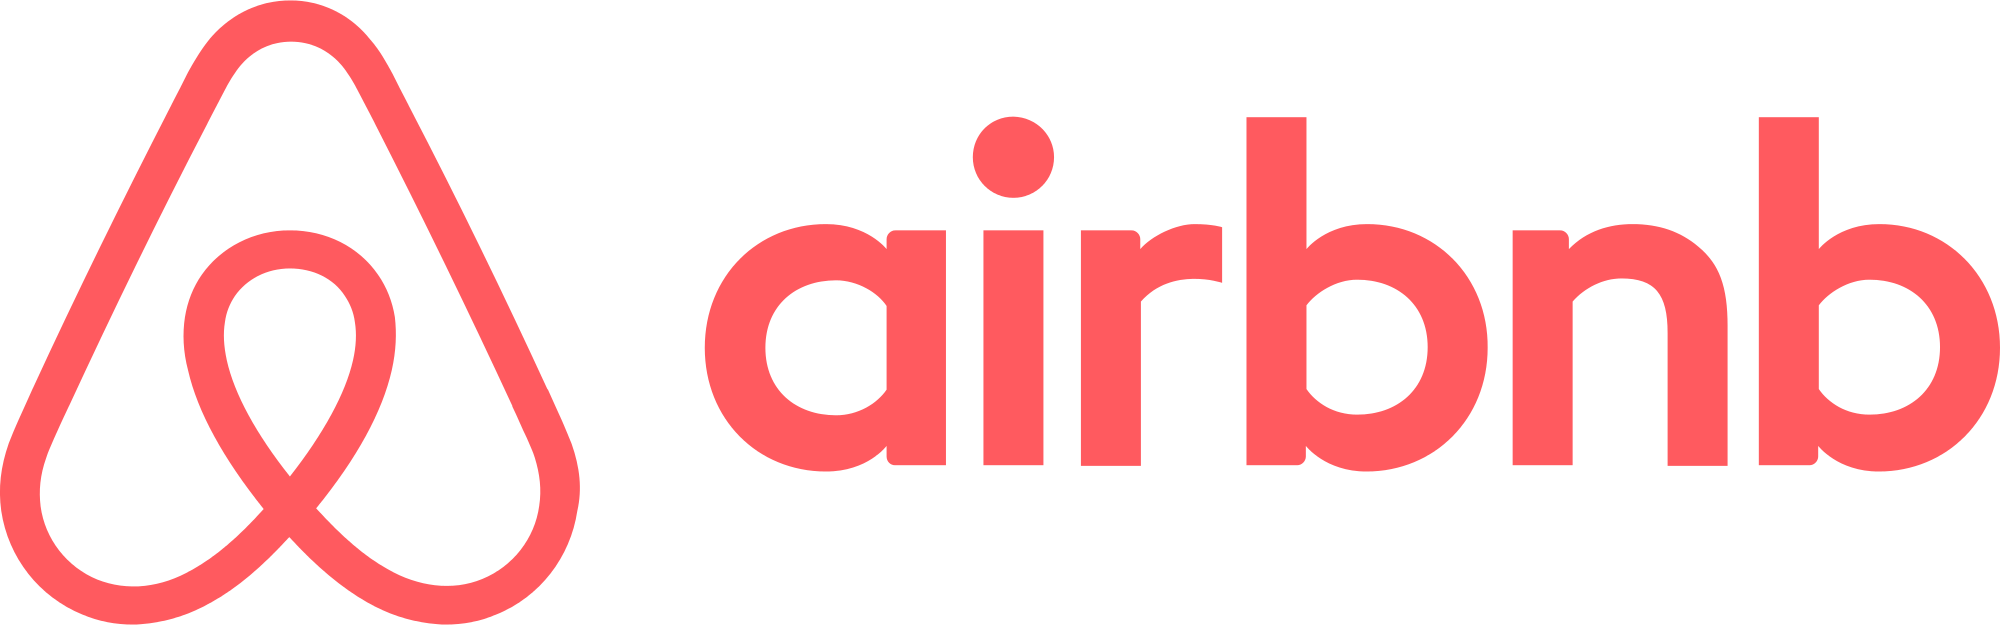

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

# <b> Explore and analyze the data to discover key understandings (not limited to these) such as :
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>



**✅INITIAL SETTINGS AND LOADING OF DATA OF airbnb**

---



---


In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**✅MOUNT THE DATA FROM DRIVE** 

---



---



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**✅LOADING DATA FROM THE OFFLINE FILES** 

---



---




In [ ]:
df=pd.read_csv("/content/drive/MyDrive/CAPSTONE PROJECT/Copy of Airbnb NYC 2019.csv")

**✅INSPECTING OF DATA**

---



---



In [ ]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


**✅OBTAINING IMPORTANT INFORMATION**

---



---





In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     


**✅IMPORTANT INSIGHTS FROM DATA**




---



---



1.   The total number of rows and columns are 48895 and 16 .
2.   There are null values and missing data we need to clean those .



**✅FINDING OUT NULL VALUES**

---



---



In [ ]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

**✅OBSERVATION FROM THE DATA**


---



---



1.   Columns like name ,host_name ,last_review and review_per_month have missing values .
2.  Columns like host_name ,name and last_reviews are not important , therefore we can drop these columns.

1.   last_review  and reviews_per_month columns have NaN and they are connected ,hence when the date is missing in last_review the values in review_per_month is also missing .











**✅LETS DROP THE COLUMN name, host_name and last_review**

---



---



In [ ]:
df.drop([ "name", "host_name" ,"last_review"],inplace=True ,axis=1)

**✅CHECKING NULL VALUES AGAIN**

---



---



*   Null values exists only in review_per_months columns



In [ ]:
df.isnull().sum()

id                                    0
host_id                               0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

✅**REPLACING THE NaN VALUES WITH ZEROS**

---



---



*   All null values are eliminated



In [ ]:
df.fillna({'reviews_per_month':0},inplace=True)

In [ ]:
df.isnull().sum()

id                                0
host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [ ]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.090910,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.597283,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


✅**OBSERVATIONS**:
---



---



1.   The minimum price is zero which is very unlikely.
2.   The maximum minimum_nights is 1250 , which is not appropriate



✅**ROW WHICH HAVE PRICE ZERO**

---



---



In [ ]:
df[df['price']==0]


,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
23161,18750597,8993084,Brooklyn,Bedford-Stuyvesant,40.69023,-73.95428,Private room,0,4,1,0.05,4,28
25433,20333471,131697576,Bronx,East Morrisania,40.83296,-73.88668,Private room,0,2,55,2.56,4,127
25634,20523843,15787004,Brooklyn,Bushwick,40.69467,-73.92433,Private room,0,2,16,0.71,5,0
25753,20608117,1641537,Brooklyn,Greenpoint,40.72462,-73.94072,Private room,0,2,12,0.53,2,0
25778,20624541,10132166,Brooklyn,Williamsburg,40.70838,-73.94645,Entire home/apt,0,5,3,0.15,1,73
25794,20639628,86327101,Brooklyn,Bedford-Stuyvesant,40.68173,-73.91342,Private room,0,1,93,4.28,6,176
25795,20639792,86327101,Brooklyn,Bedford-Stuyvesant,40.68279,-73.91170,Private room,0,1,95,4.37,6,232
25796,20639914,86327101,Brooklyn,Bedford-Stuyvesant,40.68258,-73.91284,Private room,0,1,95,4.35,6,222
26259,20933849,13709292,Manhattan,Murray Hill,40.75091,-73.97597,Entire home/apt,0,3,0,0.00,1,0
26841,21291569,101970559,Brooklyn,Bushwick,40.69211,-73.90670,Shared room,0,30,2,0.11,6,333


In [ ]:
relevent=['price','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365']
df[relevent].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,152.720687,7.029962,23.274466,1.090910,7.143982,112.781327
std,240.154170,20.510550,44.550582,1.597283,32.952519,131.622289
min,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


✅**A FUNCTION FOR PRICE CORRECTION**

---



---



*   Excluding the row with price as zero

In [ ]:

df=df.loc[df['price']>0]
df[relevent].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,48884.000000,48884.000000,48884.000000,48884.000000,48884.000000,48884.000000
mean,152.755053,7.029887,23.271991,1.090800,7.144628,112.779498
std,240.170260,20.512224,44.551331,1.597213,32.956185,131.627271
min,10.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


## ⌛ **EXPLORATORY DATA ANALYSIS** 

---



---






✅ **CORRELATION MATRIX FORMATION**
---



---




*   From the below correlation matrix we come to know that the number_of_reviews and reviews_per_month are highly correlated variables as compared to other variable. 





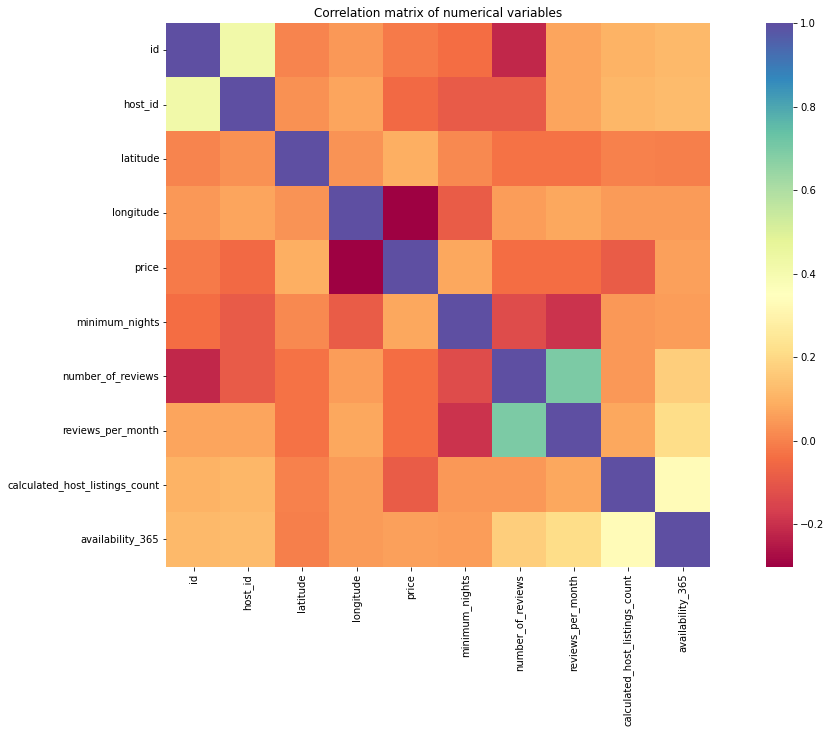

In [ ]:
plt.figure(figsize=(20,10))
title = 'Correlation matrix of numerical variables'
sns.heatmap(df.corr(method='kendall'),cmap='Spectral', square=True)
plt.title(title)
plt.ioff()

#**✅ ANALYSING THE COLUMN 'neighbourhood_group' BY USING PIECHART**

*  From the below Pie Chart we come to that airbnb have maximum number of hotels in Manhattan followed by Brooklyn ,Queens ,Bronx and Staten Island



---


---





In [ ]:
all_neighbourhood_group=df.groupby('neighbourhood_group')['id'].count().reset_index()
all_neighbourhood_group

,neighbourhood_group,id
0,Bronx,1090
1,Brooklyn,20095
2,Manhattan,21660
3,Queens,5666
4,Staten Island,373


✅**USING SEABORN COLOR PALETTE**

---



---



In [ ]:
colors = sns.color_palette('bright')[0:5]

✅**PLOTTING ON PIE CHART**
---



---



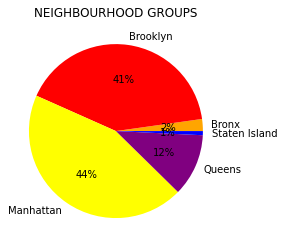

In [ ]:
plt.pie(all_neighbourhood_group['id'],labels=all_neighbourhood_group['neighbourhood_group'],
        colors = ('orange','red','yellow',"purple","blue"), autopct='%.0f%%')
plt.title("NEIGHBOURHOOD GROUPS")
plt.show()

✅**SCATTER PLOT**

---



---



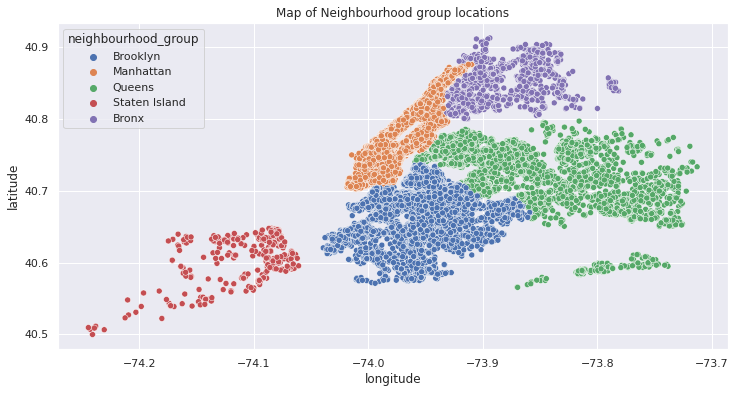

In [ ]:
title='Map of Neighbourhood group locations'
sns.set(rc={"figure.figsize":(12, 6)})
sns.scatterplot(x=df['longitude'],y=df['latitude'],hue=df['neighbourhood_group']).set_title(title)
plt.ioff()

### ✅**ANALYSING THE HIGHEST host_id**

---



---



In [ ]:
df.columns

Index(['id', 'host_id', 'neighbourhood_group', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

✅**CONSIDERING THE TOP 10 host_id**

---



In [ ]:
max_hostid=df['host_id'].value_counts().head(10)
max_hostid

219517861    327
107434423    232
30283594     121
137358866    103
12243051      96
16098958      96
61391963      91
22541573      87
200380610     65
7503643       52
Name: host_id, dtype: int64

✅**CREATING A DATAFRAME FOR host_id**

---



---



In [ ]:
df_hostid=pd.DataFrame(data=max_hostid)
df_hostid.reset_index(inplace=True)
df_hostid.rename(columns={'index':'Host_ID', 'host_id':'Listings_Count'}, inplace=True)
df_hostid

,Host_ID,Listings_Count
0,219517861,327
1,107434423,232
2,30283594,121
3,137358866,103
4,12243051,96
5,16098958,96
6,61391963,91
7,22541573,87
8,200380610,65
9,7503643,52


✅**SETTING THE RUNTIME CONFIGURATION AND PARAMETERS FOR ALL VISUALISATION**

---



---



From the below Bar Chart we come to know that 219517861 host_id have highest stays

In [ ]:
sns.set(rc={'figure.figsize':(10,6)})
sns.set_style('white')

[Text(0, 0, '7503643'),
 Text(0, 0, '12243051'),
 Text(0, 0, '16098958'),
 Text(0, 0, '22541573'),
 Text(0, 0, '30283594'),
 Text(0, 0, '61391963'),
 Text(0, 0, '107434423'),
 Text(0, 0, '137358866'),
 Text(0, 0, '200380610'),
 Text(0, 0, '219517861')]

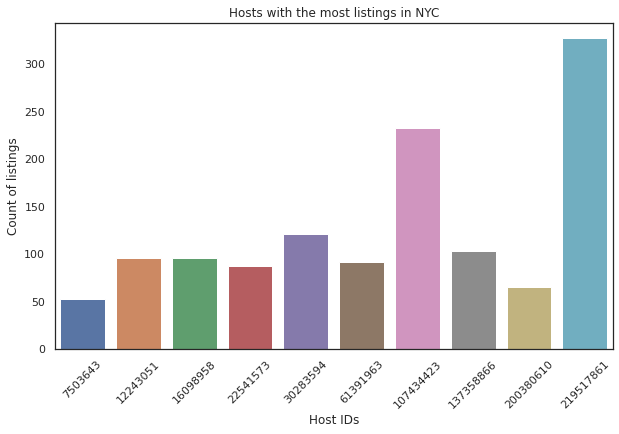

In [ ]:
from matplotlib.colors import Colormap
fig_1=sns.barplot(x='Host_ID',y='Listings_Count',data=df_hostid)
fig_1.set_title('Hosts with the most listings in NYC')
fig_1.set_ylabel('Count of listings')
fig_1.set_xlabel('Host IDs')
fig_1.set_xticklabels(fig_1.get_xticklabels(), rotation=45)

### ✅**ANALYSIS ROOM TYPE LOCATION PER NEIGHBOURHOOD GROUP**

*   Listing of all home or apartment is the highest in Manhattan while Brooklyn has private room listing at the highest though entire home or apt listing is not so far behind.



*   It can be observed that shared rooms have  less listing in each of  neighbourhood groups.





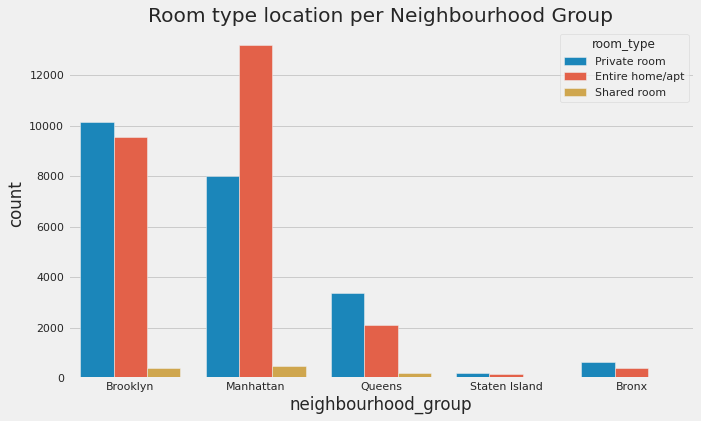

In [ ]:
from seaborn.widgets import color_palette
title = 'Room type location per Neighbourhood Group'
sns.countplot(x='neighbourhood_group',hue='room_type', data=df);
plt.title(title)
plt.ioff()

###✅ **ANALYSING PRICE ATTRIBUTES** 

---



---



**◼ ANALYSING neighbourhood_group with Price**

---



---








*   From the below Box Plot we can see that Manhattam is the most expensive destination immediatly followed by Brooklyn.
*   Queens, staten island and Bronx, are having price range less as compaired to other two.



In [ ]:
price_df = pd.DataFrame(df['price'].apply(price_catagory))

In [ ]:
price_df.head()

,price
0,affordable
1,affordable
2,affordable
3,affordable
4,cheep


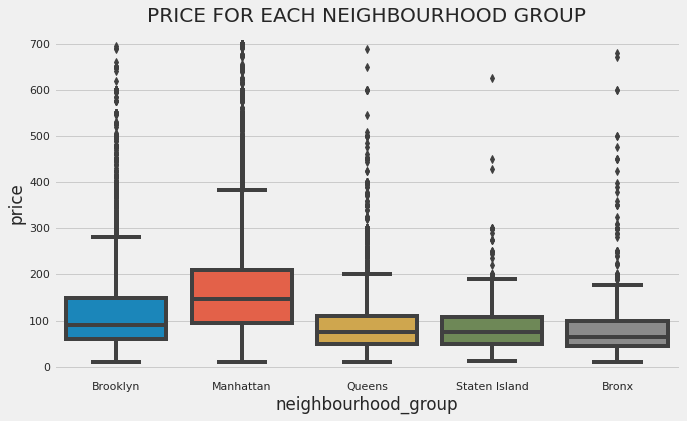

In [ ]:
plt.style.use('fivethirtyeight')

price_500 = df[df.price <700]
plt.figure(figsize=(10,6))
plt.title("PRICE FOR EACH NEIGHBOURHOOD GROUP")
sns.boxplot(y= 'price',x= 'neighbourhood_group',data=price_500)
plt.show()


**✅ ANALYSING THE RELATION BETWEEN neighbourhood_group and MEDIAN Price**

---



---





In [ ]:
neigh_group_price_group = df.groupby(['neighbourhood_group']).agg({'price':'median'}).reset_index()
neigh_group_price_group

,neighbourhood_group,price
0,Bronx,65.0
1,Brooklyn,90.0
2,Manhattan,150.0
3,Queens,75.0
4,Staten Island,75.0


**✅ PLOTTING A BAR PLOT**

---



---



*   We can observe that Manhattan is having the highest median price,followed by Brooklyn.

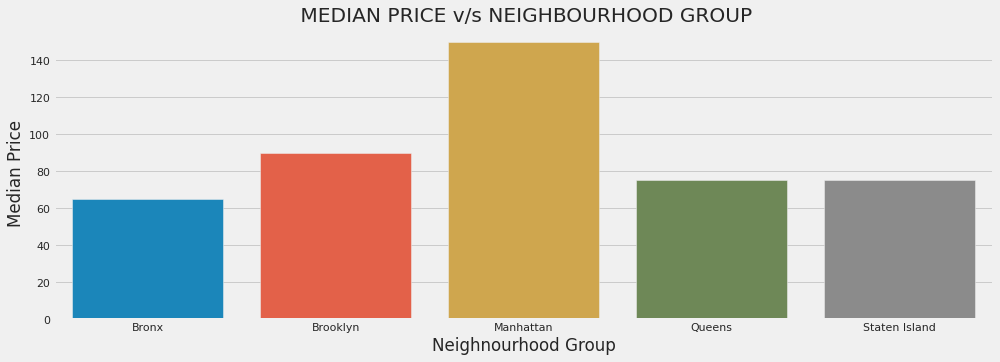

In [ ]:
plt.figure(figsize=(15,5))
ax_12 = sns.barplot(x = 'neighbourhood_group',y = 'price',data = neigh_group_price_group)
ax_12.set_title(' MEDIAN PRICE v/s NEIGHBOURHOOD GROUP')
ax_12.set_xlabel('Neighnourhood Group')
ax_12.set_ylabel("Median Price")
plt.show()


In [ ]:
neigh_price_group = df.groupby(['neighbourhood']).agg({'price':'median'}).reset_index()
neigh_price_group

,neighbourhood,price
0,Allerton,66.5
1,Arden Heights,72.5
2,Arrochar,65.0
3,Arverne,125.0
4,Astoria,85.0
...,...,...
216,Windsor Terrace,123.0
217,Woodhaven,52.0
218,Woodlawn,68.0
219,Woodrow,700.0


**✅ PLOTTING A BAR PLOT OF Median_price Vs Neighbourhood**

---

---








*   From the below Bar plot we come to know that Arrochar have the lowest price and Battery Park City have the highest in the Neighbourhood.






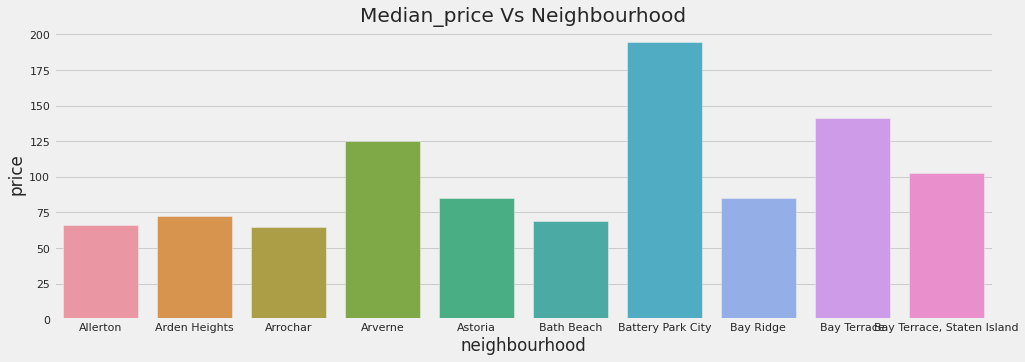

In [ ]:
plt.figure(figsize=(15,5))
sns.barplot(x = 'neighbourhood',y = 'price',data = neigh_price_group.head(10))
plt.title("Median_price Vs Neighbourhood")
plt.show()

**✅ANALYSING THE RELATION BETWEEN price and room_type**

---
From the below barplot we can observe that:

---



---




*   Shared Room have lower price.
*   Entire home/Appartment have the Highest Price.





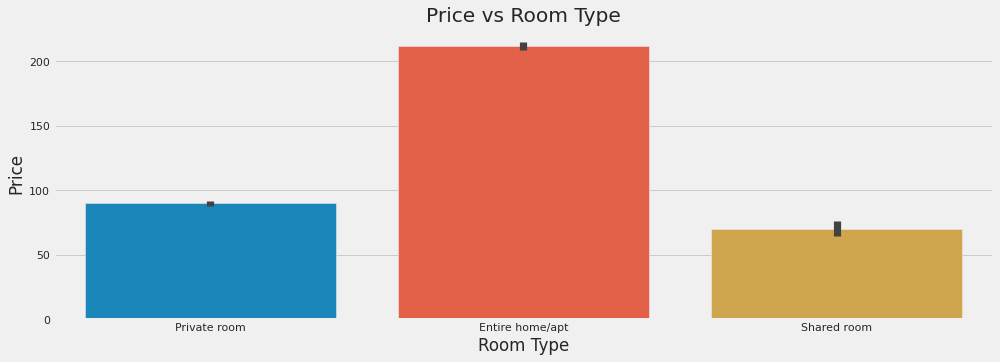

In [ ]:
plt.figure(figsize = (15,5))
ax_8 = sns.barplot(y= 'price', x= 'room_type',data=df)
ax_8.set_title('Price vs Room Type')
ax_8.set_xlabel('Room Type')
ax_8.set_ylabel("Price")
plt.show()


**✅ANALYSING PRICE WITH VARIOUS OTHER FACTORS**


---



---


1.   minimum_nights
2.   no_of_reviews
3.   calculated_host_listings_count
4.   reviews_per_months










**1.minimum_nights v/s price**

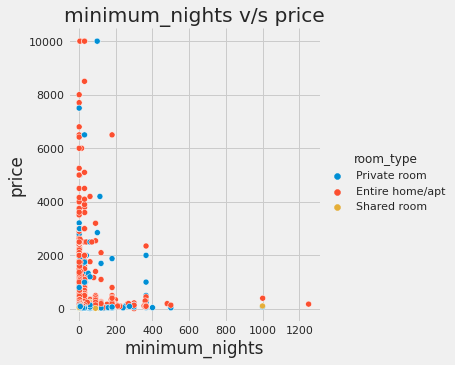

In [ ]:
sns.relplot(x='minimum_nights',y='price',hue='room_type',data=df)
plt.title("minimum_nights v/s price")
plt.show()

**2. no_of_reviews v/s price** 




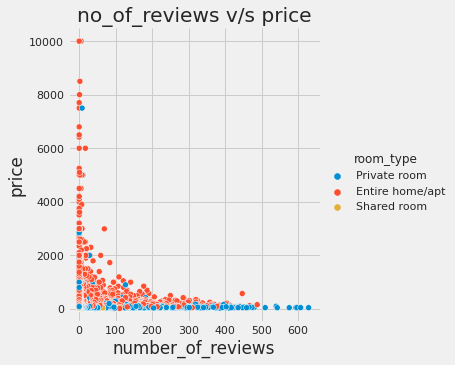

In [ ]:
sns.relplot(x='number_of_reviews',y='price',hue='room_type',data=df)
plt.title('no_of_reviews v/s price')
plt.show()

**3.calculated_host_listings_count v/s price**

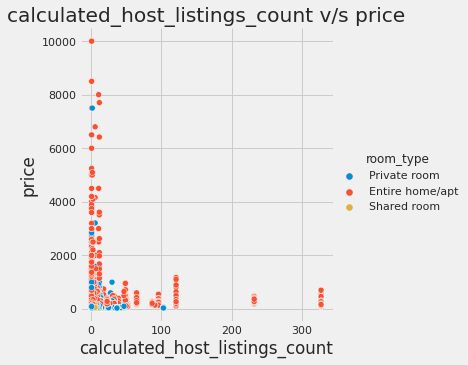

In [ ]:
sns.relplot(x='calculated_host_listings_count',y='price',hue='room_type',data=df)
plt.title("calculated_host_listings_count v/s price")
plt.show()


**4.reviews _per_month v/s price**

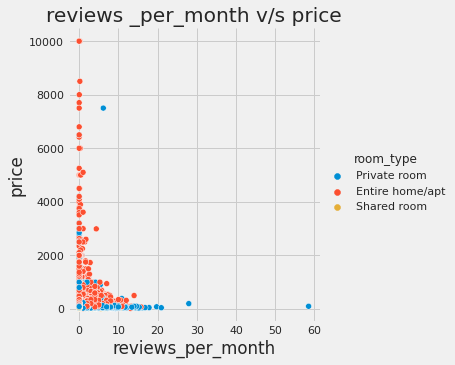

In [ ]:
sns.relplot(x="reviews_per_month",y='price',hue='room_type',data=df)
plt.title('reviews _per_month v/s price')
plt.show()


✅ **TOP 10 EXPENSIVE NEIGHBOURHOOD BASED ON THE AVERAGE PRICE**

---



---





In [ ]:
temp= df.groupby(["neighbourhood"])['price'].aggregate(np.median).reset_index().sort_values('price')

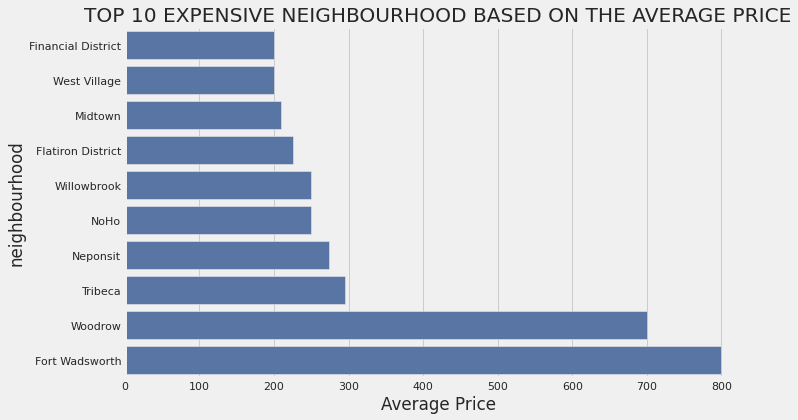

In [ ]:
sns.barplot(x="price", y="neighbourhood", data=temp[-10:],
            label="Total", color='b').set(xlabel='Average Price')
plt.title('TOP 10 EXPENSIVE NEIGHBOURHOOD BASED ON THE AVERAGE PRICE')
plt.show()

✅ **TOP 10 INEXPENSIVE NEIGHBOURHOOD BASED ON THE AVERAGE PRICE**

---



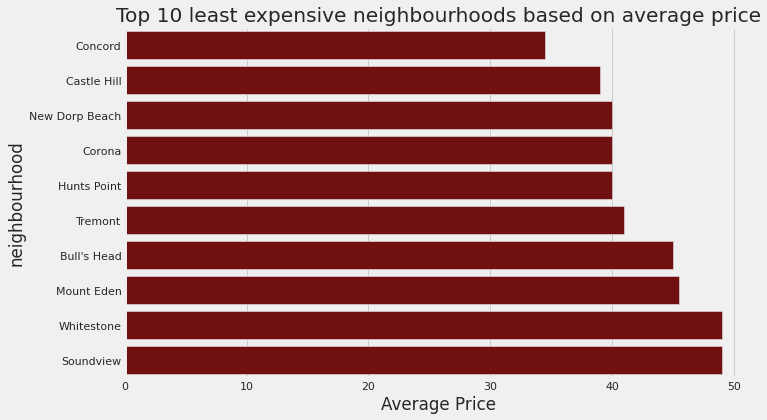

In [ ]:
sns.barplot(x="price", y="neighbourhood", data=temp[:10],
            label="Total", color="maroon").set(xlabel='Average Price')
plt.title('Top 10 least expensive neighbourhoods based on average price')
plt.show()

 ## **💎 FINAL CONCLUSION**
**Through this examination we uncover the underlying structure of a data set and  exposed trends, patterns, and relationships that are not readily apparent.**





**THE END**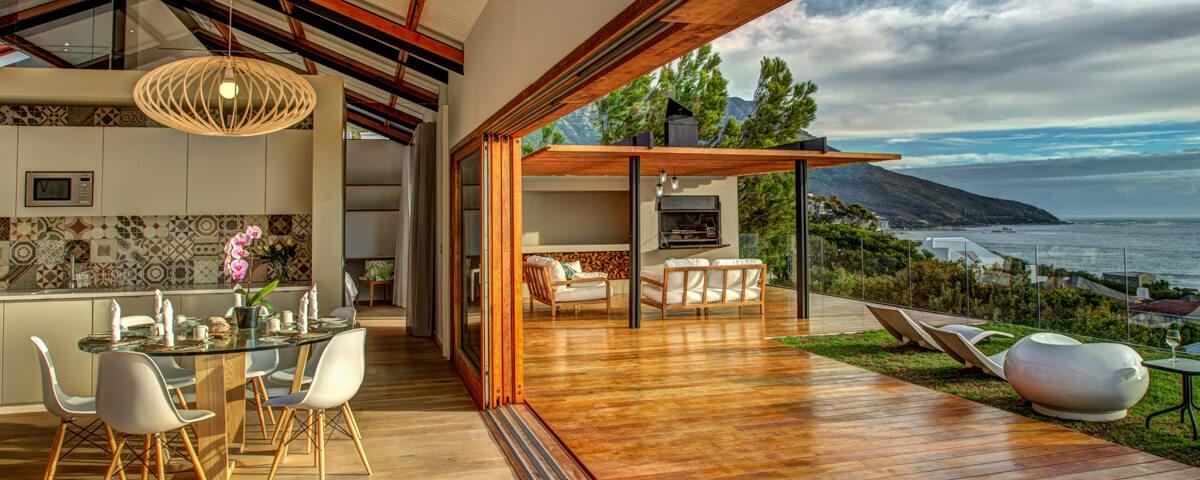


